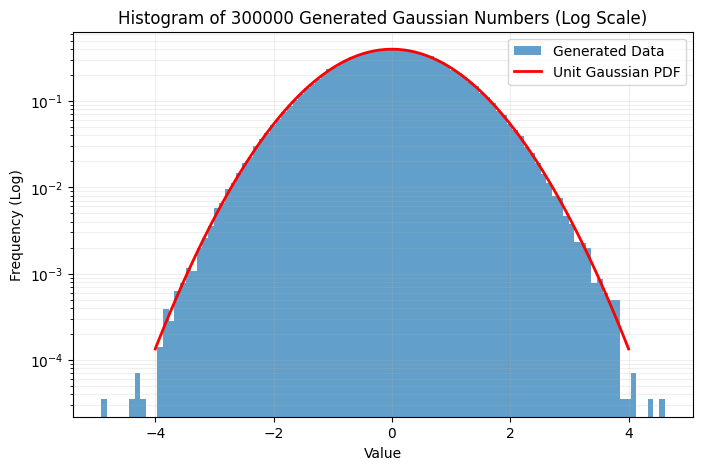

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class LCG:
    def __init__(self, seed=12345):
        # Constants from "Numerical Recipes"
        self.a = 1664525
        self.c = 1013904223
        self.m = 2**32
        self.state = seed

    def random(self):
        """Returns a uniform random number in [0, 1)"""
        self.state = (self.a * self.state + self.c) % self.m
        return self.state / self.m

    def random_list(self, n):
        """Helper to generate a list of n uniform randoms"""
        return [self.random() for _ in range(n)]

def generate_gaussian(n, seed=42):
    lcg = LCG(seed)
    gaussians = []
    
    for _ in range(n // 2 + 1):
        u1 = lcg.random()
        u2 = lcg.random()
        
        # Avoid log(0)
        if u1 == 0: u1 = 1e-10
            
        # Box-Muller Formulas
        z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
        z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
        
        gaussians.append(z0)
        gaussians.append(z1)
        
    return np.array(gaussians[:n])

N = 300000
gaussian_data = generate_gaussian(N)

plt.figure(figsize=(8, 5))
plt.hist(gaussian_data, bins=100, density=True, alpha=0.7, label='Generated Data')

x = np.linspace(-4, 4, 100)
pdf = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)
plt.plot(x, pdf, 'r-', linewidth=2, label='Unit Gaussian PDF')

plt.yscale('log')
plt.title(f"Histogram of {N} Generated Gaussian Numbers (Log Scale)")
plt.xlabel("Value")
plt.ylabel("Frequency (Log)")
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

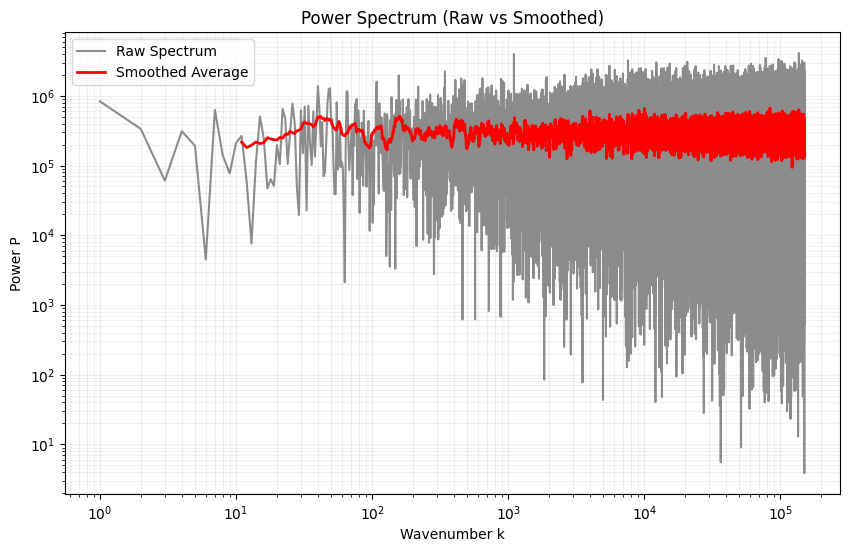

In [17]:
import numpy as np
import matplotlib.pyplot as plt

fft_result = np.fft.fft(gaussian_data)

power_spectrum = np.abs(fft_result)**2

N = len(gaussian_data)
k_values = np.arange(N)

half_point = N // 2

y_data = power_spectrum[1:half_point]
x_data = k_values[1:half_point]

window_size = 20
kernel = np.ones(window_size) / window_size
smoothed_spectrum = np.convolve(y_data, kernel, mode='valid')

shift = window_size // 2
x_smoothed = x_data[shift : shift + len(smoothed_spectrum)]

plt.figure(figsize=(10, 6))

plt.loglog(x_data, y_data, alpha=0.9, color='gray', label='Raw Spectrum')

plt.loglog(x_smoothed, smoothed_spectrum, 'r-', linewidth=2, label='Smoothed Average')

plt.title("Power Spectrum (Raw vs Smoothed)")
plt.xlabel("Wavenumber k")
plt.ylabel("Power P")
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

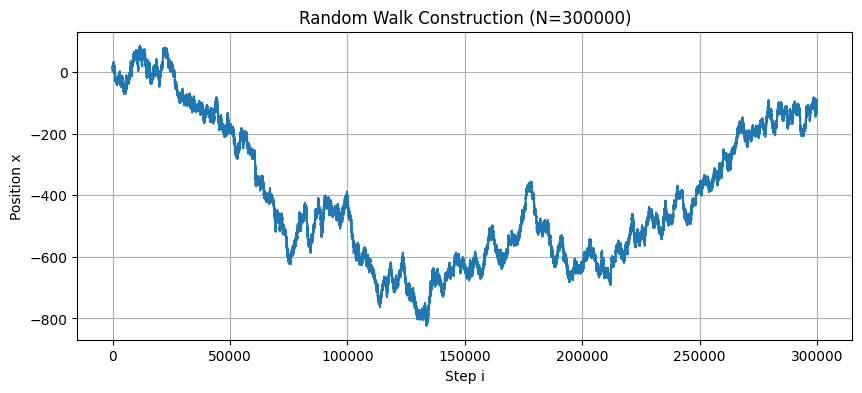

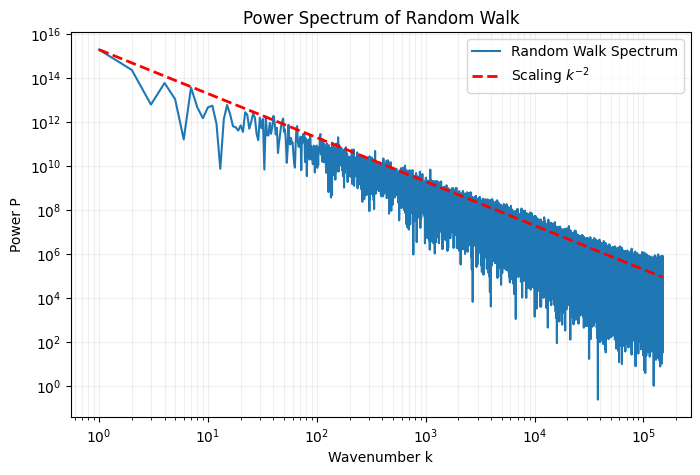

In [11]:

random_walk = np.cumsum(gaussian_data)

plt.figure(figsize=(10, 4))
plt.plot(random_walk)
plt.title(f"Random Walk Construction (N={N})")
plt.xlabel("Step i")
plt.ylabel("Position x")
plt.grid(True)
plt.show()

walk_fft = np.fft.fft(random_walk)
walk_power = np.abs(walk_fft)**2

plt.figure(figsize=(8, 5))

plt.loglog(k_values[1:half_point], walk_power[1:half_point], label='Random Walk Spectrum')

reference_line = walk_power[1] * k_values[1:half_point]**(-2.0)
plt.loglog(k_values[1:half_point], reference_line, 'r--', linewidth=2, label=r'Scaling $k^{-2}$')

plt.title("Power Spectrum of Random Walk")
plt.xlabel("Wavenumber k")
plt.ylabel("Power P")
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()